<a href="https://colab.research.google.com/github/Ignacioelamo/LLMs4Phishing/blob/main/02_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalación Previa

## Descargas

In [1]:
!pip install --upgrade --force-reinstall gensim pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 113.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.9/134.9 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398

In [2]:
!pip install --upgrade --force-reinstall pandas numpy==1.26.4

  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstal

In [1]:
!pip install nltk
import nltk

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
NOMBRE_ARCHIVO = 'emails.csv'

!wget https://raw.githubusercontent.com/Ignacioelamo/LLMs4Phishing/main/data/01_combined_cleaned_email_data.csv -O $NOMBRE_ARCHIVO

--2025-05-29 11:57:15--  https://raw.githubusercontent.com/Ignacioelamo/LLMs4Phishing/main/data/01_combined_cleaned_email_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10064045 (9.6M) [text/plain]
Saving to: ‘emails.csv’

emails.csv          100%[===================>]   9.60M  --.-KB/s    in 0.1s    

2025-05-29 11:57:16 (90.2 MB/s) - ‘emails.csv’ saved [10064045/10064045]



## Librerías

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re


import spacy
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Extracción de las características del cuerpo del correo:
1. **body_html=contains_html**: This is a binary feature that represents the presence of HTML in the email body.  
2. **body_forms**: This binary feature represents the presence of forms in HTML email bodies.
3. **body_noWords**: This feature measures the total number of words occurring in the email.
4.  **body_noCharacters**: This feature measures the total number of characters occurring in the email body.
5.  **body_noDistinctWords**: This feature measures the total number of distinct words occurring in the body of the email.  
6. **body_richness**: The richness is defined as the ratio of the number of words to the number of characters in the document.
$$
\text{body_richness} = \frac{\text{body_noWords}}{\text{body_noCharacters}}
$$
8. **body_noFunctionWords** Chandrasekaran [6] also listed a set of function words that included:  
`account`, `access`, `bank`, `credit`, `click`, `identity`, `inconvenience`, `information`, `limited`, `log`, `minutes`, `password`, `recently`, `risk`, `social`, `security`, `service`, and `suspended`.  The `body_noFunctionWords` feature measures the total number of occurrences of these function words in the email body.
9. **body_suspension** This binary feature represents the presence of the word **"suspension"** in the body of the email.  
10.  **body_verifyYourAccount** This binary feature represents the presence of the phrase **"verify your account"** in the body of the email.
11. **body_text** contains information regarding the context and purpose of an email. For this, we extract the plain text from the email body and use word embedding techniques to represent it.

Añadimos las features que ya teníamos: has_attachment, contains_html, urls.

In [ ]:
#Es necesario la version de numpy= 1.26.4
#%pip install --upgrade --force-reinstall numpy==1.26.4 pandas

In [7]:
df = (
    pd.read_csv(NOMBRE_ARCHIVO)
      .assign(
          # Feature 3: body_noWords (Total number of words)
          body_noWords=lambda df: df['body'].apply(lambda x: len(str(x).split())),

          # Feature 4: body_noCharacters (Total number of characters)
          body_noCharacters=lambda df: df['body'].apply(lambda x: len(str(x))),

          # Feature 5: body_noDistinctWords (Total number of distinct words)
          body_noDistinctWords=lambda df: df['body'].apply(lambda x: len(set(str(x).split()))),

          # Feature 6: body_richness (Ratio of words to characters)
          body_richness=lambda df: df['body'].apply(lambda x: len(str(x).split())) / df['body'].apply(lambda x: len(str(x))),

          # Feature 7: body_noFunctionWords (Count of specific function words)
          body_noFunctionWords=lambda df: df['body'].apply(
              lambda x: sum(1 for word in str(x).split()
                          if word.lower() in ['account', 'access', 'bank', 'credit', 'click',
                                            'identity', 'inconvenience', 'information', 'limited',
                                            'log', 'minutes', 'password', 'recently', 'risk',
                                            'social', 'security', 'service', 'suspended'])
          )
      )
)

Para sacar los tópicos de los correos podemos hacerlo de dos formas:
1. BERTopic: usa embeddings contextuales para agrupar documentos, y luego re-pondera con TF-IDF para extraer términos.
2. LDA: modelo generativo de tópicos sobre Bag-of-Words, que descubre distribuciones de palabras.

## LDA

In [8]:
!pip install spacy
!pip install --upgrade --force-reinstall gensim pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 125.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
  Using cached gensim-4.3.3-cp311

In [9]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy
import nltk

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [10]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords


stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'http', 'www', ])

In [12]:
df = pd.read_csv(NOMBRE_ARCHIVO)

In [13]:
data = df.body.values.tolist()

# 1. Eliminar direcciones de correo electrónico
data = [re.sub(r'\S*@\S*\s?', '', sent) for sent in data]

# 2. Eliminar URLs
data = [re.sub(r'http\S+|www\S+|https\S+', '', sent, flags=re.MULTILINE) for sent in data]

# 3. Eliminar saltos de línea y normalizar espacios
data = [sent.replace('\n', ' ').replace('\r', ' ') for sent in data]
data = [' '.join(sent.split()) for sent in data]

# 4. Eliminar comillas simples
data = [sent.replace("'", "") for sent in data]

# 5. Eliminar caracteres especiales, mantener solo letras y espacios
data = [re.sub(r'[^a-zA-Z\s]', '', sent) for sent in data]

# 6. Eliminar números sueltos
data = [re.sub(r'\b\d+\b', '', sent) for sent in data]

# 7. Eliminar códigos alfanuméricos largos predominantemente numéricos
data = [
    ' '.join([
        word for word in sent.split()
        if not (len(word) > 3 and any(char.isdigit() for char in word) and not any(char.isalpha() for char in word.replace('.', '')))
    ])
    for sent in data
]

data = [
    re.sub(
        r'\b[a-z]*\d+[a-z\d]*\b',
        lambda m: '' if len(m.group(0)) > 5 and sum(c.isdigit() for c in m.group(0)) > sum(c.isalpha() for c in m.group(0)) / 2 else m.group(0),
        sent
    )
    for sent in data
]



In [14]:
pprint(df['body'][1])
print('\n')
pprint(data[1])

('conquer your fears and find out exactly what a life without limits feels '
 'like million dollar self empowerment program generate 500 1 500 and 3 500 to '
 'your door simply by returning phone calls empower you to share gifts and '
 'realize your ultimate fulfillment allow you to help others with their needs '
 'as well as yourself allow you the opportunity to create a six figure '
 'lifestyle in the next 6 12 months you will not have to sell explain or '
 'convince anyone of anything our program will do this for you if you can '
 'return a phone call this is for you anyone can do this there are no products '
 'for you to buy in this program ever so pick up that phone and call the info '
 'line now to get further details without 0bligation of any kind 1 8oo 57o '
 '1895 regards maybe this is not something you are ready for just yet then '
 'reply back with your desire to not know anymore')


('conquer your fears and find out exactly what a life without limits feels '
 'like million 

In [15]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[1])

['conquer', 'your', 'fears', 'and', 'find', 'out', 'exactly', 'what', 'life', 'without', 'limits', 'feels', 'like', 'million', 'dollar', 'self', 'empowerment', 'program', 'generate', 'and', 'to', 'your', 'door', 'simply', 'by', 'returning', 'phone', 'calls', 'empower', 'you', 'to', 'share', 'gifts', 'and', 'realize', 'your', 'ultimate', 'fulfillment', 'allow', 'you', 'to', 'help', 'others', 'with', 'their', 'needs', 'as', 'well', 'as', 'yourself', 'allow', 'you', 'the', 'opportunity', 'to', 'create', 'six', 'figure', 'lifestyle', 'in', 'the', 'next', 'months', 'you', 'will', 'not', 'have', 'to', 'sell', 'explain', 'or', 'convince', 'anyone', 'of', 'anything', 'our', 'program', 'will', 'do', 'this', 'for', 'you', 'if', 'you', 'can', 'return', 'phone', 'call', 'this', 'is', 'for', 'you', 'anyone', 'can', 'do', 'this', 'there', 'are', 'no', 'products', 'for', 'you', 'to', 'buy', 'in', 'this', 'program', 'ever', 'so', 'pick', 'up', 'that', 'phone', 'and', 'call', 'the', 'info', 'line', 'no

In [16]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['high_quality', 'pills', 'canadian_pharmacy', 'presents', 'cheapest', 'viagra_pills', 'online', 'buy', 'quality', 'pills', 'without', 'leaving', 'your', 'computer', 'and', 'we', 'll', 'send', 'them', 'directly', 'to', 'your', 'home', 'no', 'prescriptions', 'check', 'it', 'out', 'it', 'ten', 'times', 'cheaper', 'and', 'same', 'quality', 'click', 'to', 'buy', 'viagra', 'for', 'the', 'lowest_price', 'on', 'the', 'web']


In [17]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [18]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['high_quality', 'pill', 'canadian_pharmacy', 'present', 'cheap', 'pill', 'online', 'buy', 'quality', 'pill', 'leave', 'computer', 'send', 'directly', 'home', 'prescription', 'check', 'time', 'cheap', 'quality', 'click', 'buy', 'viagra', 'low', 'price', 'web']]


In [19]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
id2word.filter_extremes(no_below=5, no_above=0.7)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 2), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 3), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1)]]


Calculando coherencia para alpha='symmetric'...


Calculando coherencia para alpha='asymmetric'...


Calculando coherencia para alpha='auto'...


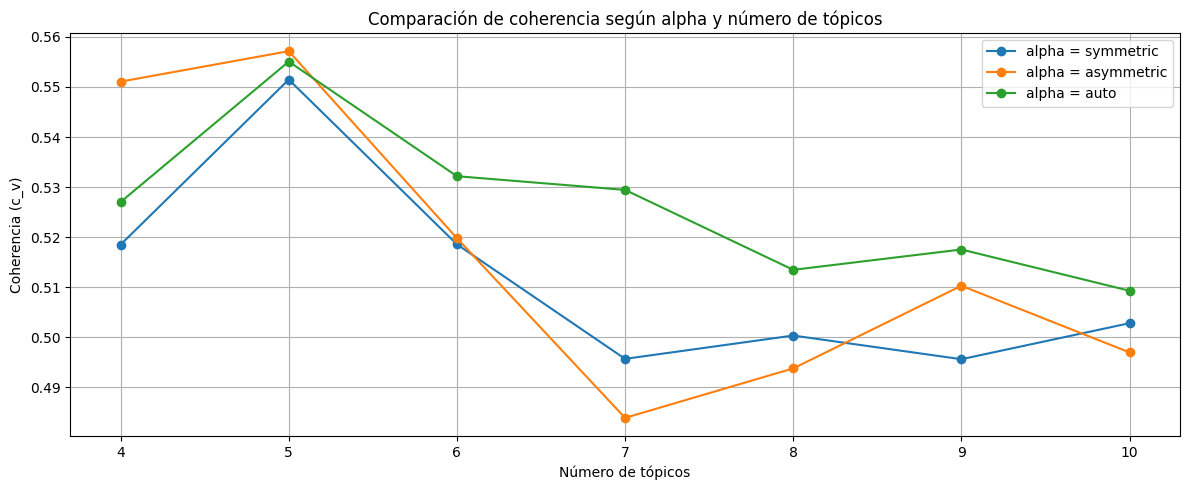

In [22]:
# === Función para entrenar y evaluar coherencia ===
def compute_coherence_values(alpha_value):
    coherence_scores = []
    topic_range = range(4, 11)
    for num_topics in topic_range:
        model = gensim.models.ldamodel.LdaModel(
            corpus=corpus,
            id2word=id2word,
            num_topics=num_topics,
            random_state=100,
            update_every=1,
            chunksize=1000,
            passes=30,
            iterations=400,
            alpha=alpha_value,
            eta='auto',
            per_word_topics=True
        )
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=id2word, coherence='c_v')
        coherence = coherence_model.get_coherence()
        coherence_scores.append(coherence)
    return list(topic_range), coherence_scores

# === Obtener resultados para cada alpha ===
alphas = ['symmetric', 'asymmetric', 'auto']
results = {}

for alpha in alphas:
    print(f"Calculando coherencia para alpha='{alpha}'...")
    x, y = compute_coherence_values(alpha)
    results[alpha] = (x, y)

# === Graficar resultados ===
plt.figure(figsize=(12, 5))

for i, alpha in enumerate(alphas):
    plt.plot(results[alpha][0], results[alpha][1], marker='o', label=f"alpha = {alpha}")

plt.title("Comparación de coherencia según alpha y número de tópicos")
plt.xlabel("Número de tópicos")
plt.ylabel("Coherencia (c_v)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
lda_model = gensim.models.ldamodel.LdaModel(
  corpus=corpus,
  id2word=id2word,
  num_topics=6,
  random_state=100,
  update_every=1,
  chunksize=1000,
  passes=30,
  iterations=400,
  alpha='asymmetric',
  eta='auto',
  per_word_topics=True
)

## 📊 Análisis de Clustering de Correos Usando LDA (6 Tópicos)

Se ha realizado un modelo de **Latent Dirichlet Allocation (LDA)** con 6 tópicos para agrupar correos electrónicos (algunos de phishing y otros legítimos). A continuación, se describe el contenido temático de cada tópico generado.

---

### 🔹 **Tópico 1: Listas de correo y contenido técnico**
**Palabras clave:**  
`"org", "write", "list", "file", "mailing_list", "use", "help", "get", "perl", "code", "net", "ect", "work", "problem", "try", "make", "run", "test", "mailman_listinfo", "need"`

**Interpretación:**  
Correos relacionados con **comunidades técnicas**, listas de distribución, documentación o discusiones sobre software. Palabras clave técnicas como `perl`, `run`, `code`, etc.  
➡️ **Muy probablemente legítimos.**

---

### 🔹 **Tópico 2: Notificaciones de cuenta y mensajes de sistemas**
**Palabras clave:**  
`"email", "account", "com", "receive", "click", "mail", "user", "message", "address", "unsubscribe", "new", "send", "team", "update", "thank", "service", "verify", "access", "change", "activity"`

**Interpretación:**  
Este clúster representa mensajes automáticos o institucionales relacionados con **cuentas de usuario, notificaciones de actividad, actualizaciones, verificación de identidad** o cambios de seguridad.  
➡️ **Puede incluir tanto correos legítimos como phishing que imitan servicios reales.**

---

### 🔹 **Tópico 3: Conversaciones personales o informales**
**Palabras clave:**  
`"com", "get", "make", "go", "well", "say", "time", "year", "want", "people", "come", "know", "good", "find", "take", "many", "give", "see", "site", "day"`

**Interpretación:**  
Este tópico agrupa correos con lenguaje conversacional, posiblemente de remitentes conocidos, newsletters o mensajes personales. Tono casual y amplio vocabulario.  
➡️ **Generalmente legítimos.**

---

### 🔹 **Tópico 4: Confirmaciones, pagos y solicitudes de información**
**Palabras clave:**  
`"information", "thank", "contact", "send", "payment", "detail", "wallet", "regard", "need", "follow", "number", "call", "claim", "day", "deal", "process", "let", "provide", "know", "confirm"`

**Interpretación:**  
Este clúster incluye **mensajes formales** solicitando o proporcionando datos personales, confirmaciones de pago, transacciones, o gestiones administrativas.  
➡️ **Mixto: puede ser legítimo o phishing sofisticado.**

---

### 🔹 **Tópico 5: Estafas financieras / phishing clásico**
**Palabras clave:**  
`"fund", "money", "country", "transfer", "business", "transaction", "contact", "account", "company", "price", "offer", "investment", "get", "name", "bank", "assistance", "need", "make", "order", "assist"`

**Interpretación:**  
Correos relacionados con **estafas clásicas**: ofertas falsas de dinero, negocios fantasmas, inversiones sospechosas, o promesas de ayuda financiera.  
➡️ **Alta probabilidad de phishing.**

---

### 🔹 **Tópico 6: Promociones, recompensas y spam**
**Palabras clave:**  
`"get", "time", "work", "com", "see", "site", "win", "take", "freebitcoin", "check", "start", "news", "good", "delete", "right", "think", "button", "earn", "information", "offer"`

**Interpretación:**  
Mensajes con contenido promocional o de **spam**: premios, promesas de ganancia, sitios de recompensas o criptomonedas. Uso frecuente de términos llamativos.  
➡️ **Puede incluir spam legítimo y phishing disfrazado de promociones.**

---

## 🛡️ Aplicación para Detección de Phishing

Basado en esta segmentación:

- 🔴 **Alta sospecha de phishing:** Tópicos **4**, **5** y **6**
- 🟡 **Potencialmente mixtos o neutros:** Tópico **2**
- 🟢 **Probablemente legítimos:** Tópicos **1** y **3**

Esto permite usar la asignación de tópicos como **feature** en un modelo de clasificación para phishing.

In [36]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.093019 -0.215088       1        1  23.006201
0      0.290564  0.026634       2        1  19.724640
1     -0.157072 -0.006839       3        1  18.841294
3      0.053804 -0.171213       4        1  17.807942
2      0.081962  0.174222       5        1  11.979566
5     -0.176239  0.192284       6        1   8.640358, topic_info=            Term         Freq        Total Category  logprob  loglift
141        email  4637.000000  4637.000000  Default  30.0000  30.0000
338      account  4111.000000  4111.000000  Default  29.0000  29.0000
4          click  2569.000000  2569.000000  Default  28.0000  28.0000
172      receive  2626.000000  2626.000000  Default  27.0000  27.0000
370          org  2591.000000  2591.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
57   opportunity   209.956494   549.870170   Topic6  -5.3095   1.4859
153  information   251.704595  2152.132873   Topic6  -5.1282   0.3028
139         dear   223.751365  1237.308318   Topic6  -5.2459   0.7386
54          need   233.466350  2029.094288   Topic6  -5.2034   0.2864
148           go   207.935405  1486.105983   Topic6  -5.3192   0.4820

[404 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
199       5  0.987935    abroad
4111      4  0.994522  abstract
1270      2  0.995474    access
1270      4  0.002785    access
338       2  0.821131   account
...     ...       ...       ...
282       6  0.005692     write
241       3  0.613723      year
241       4  0.291225      year
241       5  0.094795      year
1140      3  0.987994     young

[706 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 2, 4, 3, 6])

In [45]:
# prompt: imprime las palabras más importantes de cada cluster

pprint(lda_model.print_topics(num_words=20))
doc_lda = lda_model[corpus]


[(0,
  '0.048*"email" + 0.035*"account" + 0.026*"com" + 0.024*"receive" + '
  '0.024*"click" + 0.020*"mail" + 0.019*"user" + 0.016*"message" + '
  '0.014*"address" + 0.013*"unsubscribe" + 0.013*"new" + 0.011*"send" + '
  '0.011*"team" + 0.010*"update" + 0.009*"thank" + 0.009*"service" + '
  '0.008*"verify" + 0.007*"access" + 0.007*"change" + 0.007*"activity"'),
 (1,
  '0.012*"com" + 0.009*"get" + 0.009*"make" + 0.008*"go" + 0.007*"well" + '
  '0.007*"say" + 0.007*"time" + 0.007*"year" + 0.006*"want" + 0.006*"people" + '
  '0.006*"come" + 0.006*"know" + 0.006*"good" + 0.006*"find" + 0.005*"take" + '
  '0.005*"many" + 0.005*"give" + 0.005*"see" + 0.005*"site" + 0.005*"day"'),
 (2,
  '0.023*"fund" + 0.021*"money" + 0.016*"country" + 0.013*"transfer" + '
  '0.013*"business" + 0.012*"transaction" + 0.011*"contact" + 0.011*"account" '
  '+ 0.011*"company" + 0.010*"price" + 0.010*"offer" + 0.010*"investment" + '
  '0.010*"get" + 0.009*"name" + 0.009*"bank" + 0.009*"assistance" + '
  '0.008*"n

In [42]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.048*"email" + 0.035*"account" + 0.026*"com" + 0.024*"receive" + '
  '0.024*"click" + 0.020*"mail" + 0.019*"user" + 0.016*"message" + '
  '0.014*"address" + 0.013*"unsubscribe"'),
 (1,
  '0.012*"com" + 0.009*"get" + 0.009*"make" + 0.008*"go" + 0.007*"well" + '
  '0.007*"say" + 0.007*"time" + 0.007*"year" + 0.006*"want" + 0.006*"people"'),
 (2,
  '0.023*"fund" + 0.021*"money" + 0.016*"country" + 0.013*"transfer" + '
  '0.013*"business" + 0.012*"transaction" + 0.011*"contact" + 0.011*"account" '
  '+ 0.011*"company" + 0.010*"price"'),
 (3,
  '0.016*"information" + 0.011*"thank" + 0.010*"contact" + 0.009*"send" + '
  '0.008*"payment" + 0.008*"detail" + 0.007*"wallet" + 0.007*"regard" + '
  '0.007*"need" + 0.007*"follow"'),
 (4,
  '0.021*"org" + 0.019*"write" + 0.012*"list" + 0.012*"file" + '
  '0.011*"mailing_list" + 0.010*"use" + 0.010*"help" + 0.009*"get" + '
  '0.009*"perl" + 0.009*"code"'),
 (5,
  '0.021*"get" + 0.015*"time" + 0.015*"work" + 0.014*"com" + 0.013*"see" + '
  '0